In [1]:
# Kirolous Shenouda
# June 22, 2021
# 911 Calls Project
#
# My goal for this project is to analyze and visualize 911 calls made across the United States in 2016.
# Some details I want to figure out include the various reasons a 911 call was made, the frequency of
# 911 calls made throughout 2016, and how 911 calls differ between weekdays and weekends. 

In [6]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [7]:
df = pd.read_csv('911.csv')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
lat          99492 non-null float64
lng          99492 non-null float64
desc         99492 non-null object
zip          86637 non-null float64
title        99492 non-null object
timeStamp    99492 non-null object
twp          99449 non-null object
addr         98973 non-null object
e            99492 non-null int64
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


In [55]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,DayofWeek,Date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,Thu,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,Thu,2015-12-10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,Thu,2015-12-10


In [56]:
# The top 5 zip codes for 911 calls
df['zip'].value_counts().head(5)

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

In [57]:
# The top 5 townships for 911 calls
df['twp'].value_counts().head(5)

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

In [12]:
# The number of unique title codes for a 911 call
df['title'].nunique()

110

In [13]:
# List of all title codes
df['title']

0             EMS: BACK PAINS/INJURY
1            EMS: DIABETIC EMERGENCY
2                Fire: GAS-ODOR/LEAK
3             EMS: CARDIAC EMERGENCY
4                     EMS: DIZZINESS
                    ...             
99487    Traffic: VEHICLE ACCIDENT -
99488    Traffic: VEHICLE ACCIDENT -
99489               EMS: FALL VICTIM
99490           EMS: NAUSEA/VOMITING
99491    Traffic: VEHICLE ACCIDENT -
Name: title, Length: 99492, dtype: object

In [14]:
# I created a new column that contains the reasons for all 911 calls
df['Reason'] = df['title'].apply(lambda title: title.split(':')[0])

In [58]:
# The three reasons ranked by number of calls, and EMS (Emergency services) is the most common reason
df['Reason'].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64

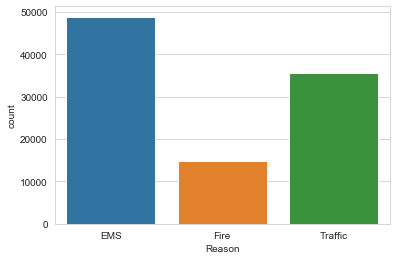

In [16]:
sns.countplot(df['Reason'])

In [17]:
type(df['timeStamp'].iloc[0])

str

In [18]:
# Since timeStamp is a string, I converted it into a datetime format in order to break it down further
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

In [19]:
df['timeStamp']

0       2015-12-10 17:40:00
1       2015-12-10 17:40:00
2       2015-12-10 17:40:00
3       2015-12-10 17:40:01
4       2015-12-10 17:40:01
                ...        
99487   2016-08-24 11:06:00
99488   2016-08-24 11:07:02
99489   2016-08-24 11:12:00
99490   2016-08-24 11:17:01
99491   2016-08-24 11:17:02
Name: timeStamp, Length: 99492, dtype: datetime64[ns]

In [20]:
# I created three new columns that specify the hour, month, and day of week each 911 call was made
df['Hour'] = df['timeStamp'].apply(lambda time: time.hour)
df['Month'] = df['timeStamp'].apply(lambda time: time.month)
df['DayofWeek'] = df['timeStamp'].apply(lambda time: time.dayofweek)

In [23]:
dmap = {0: 'Mon', 1: 'Tue', 2: 'Wed', 3: 'Thu', 4: 'Fri', 5: 'Sat', 6: 'Sun'}

In [24]:
df['DayofWeek'] = df['DayofWeek'].map(dmap)

In [25]:
df['DayofWeek']

0        Thu
1        Thu
2        Thu
3        Thu
4        Thu
        ... 
99487    Wed
99488    Wed
99489    Wed
99490    Wed
99491    Wed
Name: DayofWeek, Length: 99492, dtype: object

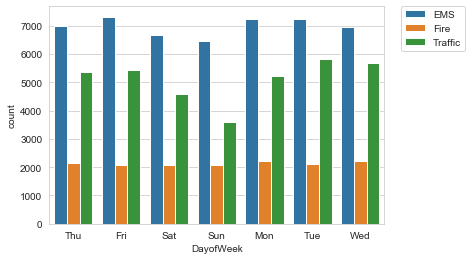

In [26]:
# The distribution of 911 calls made by day
sns.countplot(df['DayofWeek'], hue = df['Reason'])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)

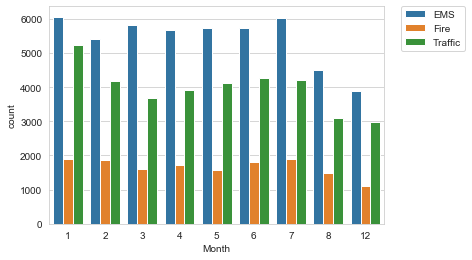

In [27]:
# The distribution of 911 calls made by month
sns.countplot(df['Month'], hue = df['Reason'])
plt.legend(bbox_to_anchor = (1.05, 1), loc = 2, borderaxespad = 0)

In [28]:
# Since there were several months missing in the plot above, I created another dataframe in order to fill in the
# missing months by plotting a line graph
byMonth = df.groupby(df['Month']).count()

In [29]:
byMonth

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,DayofWeek
Month,,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423,11423
6,11786,11786,11786,10212,11786,11786,11777,11732,11786,11786,11786,11786,11786
7,12137,12137,12137,10633,12137,12137,12133,12088,12137,12137,12137,12137,12137
8,9078,9078,9078,7832,9078,9078,9073,9025,9078,9078,9078,9078,9078
12,7969,7969,7969,6907,7969,7969,7963,7916,7969,7969,7969,7969,7969


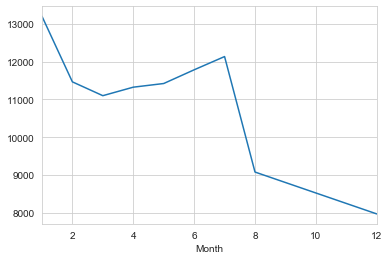

In [30]:
byMonth['lat'].plot()

In [62]:
# Like timeStamp, I converted Date into a datetime format in order to break it down further
df['Date'] = df['timeStamp'].apply(lambda d: d.date())

In [63]:
df['Date']

0        2015-12-10
1        2015-12-10
2        2015-12-10
3        2015-12-10
4        2015-12-10
            ...    
99487    2016-08-24
99488    2016-08-24
99489    2016-08-24
99490    2016-08-24
99491    2016-08-24
Name: Date, Length: 99492, dtype: object

In [64]:
# The number of 911 calls made by specific dates
df['Date'].groupby(df['Date']).count()

Date
2015-12-10    115
2015-12-11    396
2015-12-12    403
2015-12-13    319
2015-12-14    447
             ... 
2016-08-20    328
2016-08-21    357
2016-08-22    389
2016-08-23    439
2016-08-24    132
Name: Date, Length: 259, dtype: int64

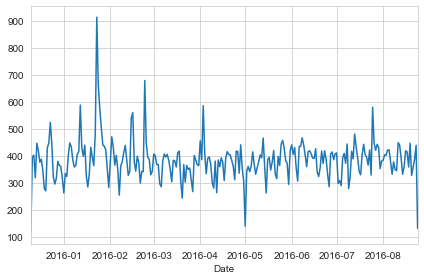

In [65]:
# This line graph plots the aggregate of 911 calls made by month throughout 2016
df['Date'].groupby(df['Date']).count().plot()
plt.tight_layout()

In [38]:
df['Date'].groupby(df['Reason']).count()

Reason
EMS        48877
Fire       14920
Traffic    35695
Name: Date, dtype: int64

In [39]:
df['Reason']

0            EMS
1            EMS
2           Fire
3            EMS
4            EMS
          ...   
99487    Traffic
99488    Traffic
99489        EMS
99490        EMS
99491    Traffic
Name: Reason, Length: 99492, dtype: object

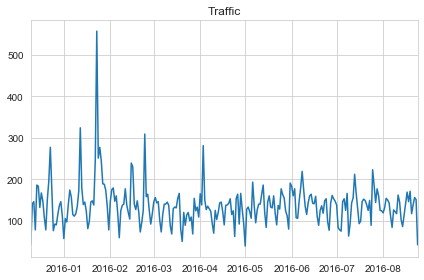

In [66]:
# This graph shows the number of 911 calls for traffic emergencies
df[df['Reason'] == 'Traffic']['Date'].value_counts().plot()
plt.title('Traffic')
plt.tight_layout()

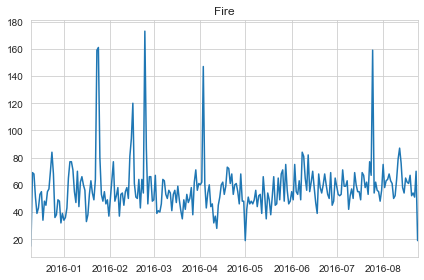

In [67]:
# This graph shows the number of 911 calls for fire emergencies
df[df['Reason'] == 'Fire']['Date'].value_counts().plot()
plt.title('Fire')
plt.tight_layout()

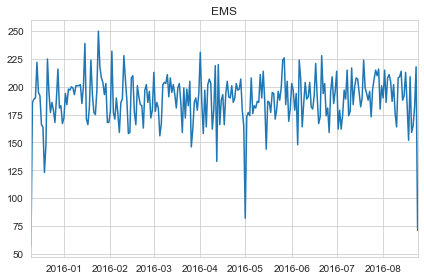

In [68]:
# This graph shows the number of 911 calls for health emergencies
df[df['Reason'] == 'EMS']['Date'].value_counts().plot()
plt.title('EMS')
plt.tight_layout()

In [43]:
# The number of 911 calls made each day
df['Hour'].groupby(df['DayofWeek']).count()

DayofWeek
Fri    14833
Mon    14680
Sat    13336
Sun    12136
Thu    14478
Tue    15150
Wed    14879
Name: Hour, dtype: int64

In [44]:
# The number of 911 calls made each hour
df['DayofWeek'].groupby(df['Hour']).count()

Hour
0     2112
1     1721
2     1549
3     1435
4     1418
5     1629
6     2513
7     3970
8     5044
9     5314
10    5413
11    5543
12    6029
13    5967
14    5997
15    6154
16    6490
17    6517
18    5762
19    4908
20    4377
21    3788
22    3283
23    2559
Name: DayofWeek, dtype: int64

In [69]:
# I created another dataframe to break down the number of 911 calls made each hour of each day
dayHour = df.groupby(by = ['DayofWeek', 'Hour']).count()['Reason'].unstack()

In [70]:
dayHour

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
DayofWeek,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354
Tue,269,240,186,170,209,239,415,655,889,880,...,943,938,1026,1019,905,731,647,571,462,274
Wed,250,216,189,209,156,255,410,701,875,808,...,904,867,990,1037,894,686,668,575,490,335


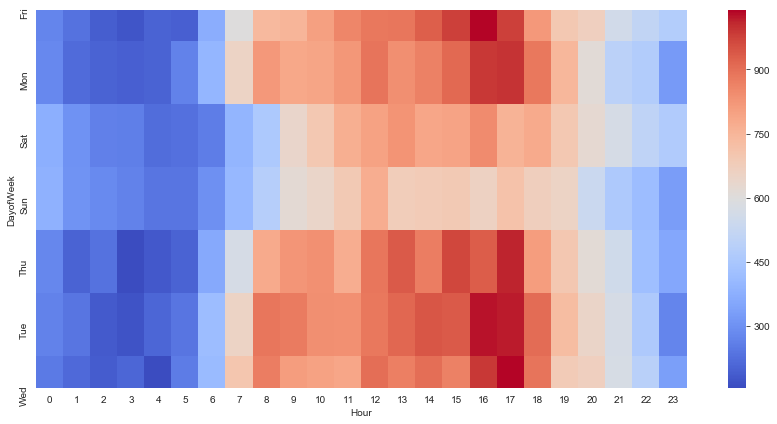

In [73]:
# This heatmap shows the density of 911 calls made at a specific hour of each day
# More 911 calls are generally made on the weekdays and during the afternoon
plt.figure(figsize = (12, 6))
sns.heatmap(dayHour, cmap = 'coolwarm')
plt.tight_layout()

In [74]:
# I created another dataframe to break down the number of 911 calls made each day of each month
dayMonth = df.groupby(by = ['DayofWeek', 'Month']).count()['Reason'].unstack()

In [75]:
dayMonth

Month,1,2,3,4,5,6,7,8,12
DayofWeek,,,,,,,,,
Fri,1970,1581,1525,1958,1730,1649,2045,1310,1065
Mon,1727,1964,1535,1598,1779,1617,1692,1511,1257
Sat,2291,1441,1266,1734,1444,1388,1695,1099,978
Sun,1960,1229,1102,1488,1424,1333,1672,1021,907
Thu,1584,1596,1900,1601,1590,2065,1646,1230,1266
Tue,1973,1753,1884,1430,1918,1676,1670,1612,1234
Wed,1700,1903,1889,1517,1538,2058,1717,1295,1262


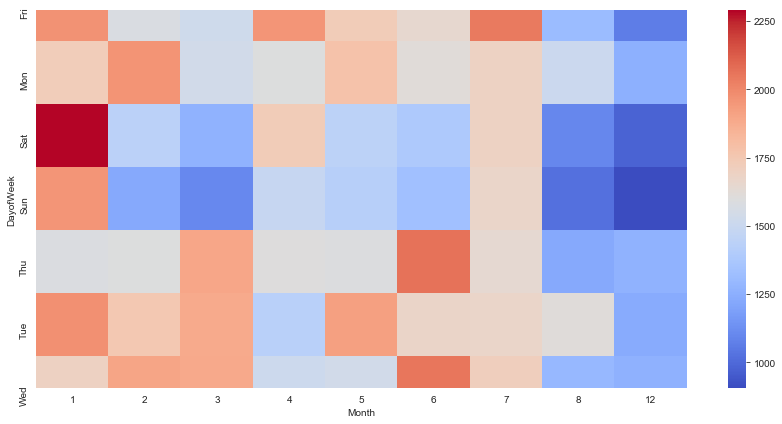

In [76]:
# This heatmap shows the density of 911 calls made at a specific day of each month
# More 911 calls are generally made between January and March, and fewer during August and December
plt.figure(figsize = (12, 6))
sns.heatmap(dayMonth, cmap = 'coolwarm')
plt.tight_layout()